In [357]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
import sklearn.metrics
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

In [367]:
# load processed csv file
filename = "all_data_processed.csv"

df = pd.read_csv(filename, index_col=None, header=0)
df = df.reset_index()
df

,index,Time,Length,Brand,Device,Action,Source
0,0,0.000,212,Apple,AppleWatch,AppleWatch_blood,0
1,1,0.000,80,Apple,AppleWatch,AppleWatch_blood,0
2,2,0.014,-8,Apple,AppleWatch,AppleWatch_blood,0
3,3,0.014,-8,Apple,AppleWatch,AppleWatch_blood,0
4,4,0.042,-80,Apple,AppleWatch,AppleWatch_blood,0
...,...,...,...,...,...,...,...
40810,40810,8.052,-22,iHealth,iHealthBp,iHealthBp_BP,9
40811,40811,8.054,18,iHealth,iHealthBp,iHealthBp_BP,9
40812,40812,8.103,-8,iHealth,iHealthBp,iHealthBp_BP,9
40813,40813,11.723,7,iHealth,iHealthBp,iHealthBp_BP,9


In [359]:
# create feature vector
# feature vector contains min/max/mean/count/std of packets and delta time
feature = {
    "incoming_min" : [],
    "incoming_max" : [],
    "incoming_mean": [],
    "incoming_count": [],
    "incoming_std": [],
    "outgoing_min" : [],
    "outgoing_max" : [],
    "outgoing_mean": [],
    "outgoing_count": [],
    "outgoing_std": [],
    "notnull_min" : [],
    "notnull_max" : [],
    "notnull_mean": [],
    "notnull_count": [],
    "notnull_std": [],
    "delta_min" : [],
    "delta_max" : [],
    "delta_mean": [],
    "delta_count": [],
    "delta_std": [], 
    "brand": [],
    "device" : [],
    "action": []
}

index_prev = 0
prev_time = 0
source_prev = 0
delta_time = []
for index, row in df.iterrows():
    # compute delta time
    delta_time.append(row['Time'] - prev_time)
    prev_time = row['Time']
    # loop every row
    if(row['Source'] != source_prev or index == len(df) - 1):
        if(index == len(df) - 1):
            index = index + 1
        # for every action
        # compute the statistical for ingoing packet length
        if(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]) == 0):
            feature.get("incoming_min").append(0)
            feature.get("incoming_max").append(0)
            feature.get("incoming_mean").append(0)
            feature.get("incoming_count").append(0)
            feature.get("incoming_std").append(0)  
        else:
            feature.get("incoming_min").append(np.min([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_max").append(np.max([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_mean").append(np.mean([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_count").append(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
            feature.get("incoming_std").append(np.std([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y > 0]))
        # compute the statistical for outgoing packet length
        if(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]) == 0):
            feature.get("outgoing_min").append(0)
            feature.get("outgoing_max").append(0)
            feature.get("outgoing_mean").append(0)
            feature.get("outgoing_count").append(0)
            feature.get("outgoing_std").append(0)      
        else:
            feature.get("outgoing_min").append(np.min([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_max").append(np.max([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_mean").append(np.mean([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_count").append(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
            feature.get("outgoing_std").append(np.std([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y < 0]))
        # compute statistical for all packet length
        feature.get("notnull_min").append(np.min([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_max").append(np.max([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_mean").append(np.mean([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_count").append(len([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        feature.get("notnull_std").append(np.std([abs(y) for y in df['Length'].loc[index_prev : index - 1] if y != 0]))
        # compute statistical for delta time
        feature.get("delta_min").append(np.min(delta_time))
        feature.get("delta_max").append(np.max(delta_time))
        feature.get("delta_mean").append(np.mean(delta_time))
        feature.get("delta_count").append(len(delta_time))
        feature.get("delta_std").append(np.std(delta_time))
        # create labels
        feature.get("brand").append(row['Brand'])
        feature.get("device").append(row['Device'])
        feature.get("action").append(row['Action'])
        source_prev = row['Source']
        prev_time = 0

        index_prev = index        


feature
features = pd.DataFrame(feature)
features

,incoming_min,incoming_max,incoming_mean,incoming_count,incoming_std,outgoing_min,outgoing_max,outgoing_mean,outgoing_count,outgoing_std,...,notnull_count,notnull_std,delta_min,delta_max,delta_mean,delta_count,delta_std,brand,device,action
0,11,256,165.937500,64,98.831276,8,256,81.715447,123,104.441645,...,187,110.066155,-26.277,17.754,0.000000e+00,188,2.373257,Apple,AppleWatch,AppleWatch_blood
1,11,256,120.029412,34,95.895619,8,256,60.279412,68,82.944142,...,102,91.897539,-28.278,17.754,0.000000e+00,290,2.703262,Apple,AppleWatch,AppleWatch_blood
2,11,256,158.100000,40,101.748661,8,256,76.025641,78,99.741586,...,118,107.679501,-28.278,17.754,-8.707632e-18,408,2.607648,Apple,AppleWatch,AppleWatch_blood
3,11,256,158.000000,40,101.864616,8,256,75.126582,79,99.353526,...,119,107.580416,-28.278,17.754,-3.370696e-18,527,2.554539,Apple,AppleWatch,AppleWatch_blood
4,11,256,160.519231,52,101.154583,8,256,71.479592,98,96.494499,...,150,106.892967,-28.278,17.754,0.000000e+00,677,2.411232,Apple,AppleWatch,AppleWatch_blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,6,32,16.755556,45,4.775658,8,34,15.146067,89,8.701738,...,134,7.650400,-30.000,29.723,1.345123e-18,40278,2.234806,iHealth,iHealthBp,iHealthBp_BP
301,6,32,16.755556,45,4.775658,8,34,15.146067,89,8.701738,...,134,7.650400,-30.000,29.723,1.274729e-18,40412,2.231297,iHealth,iHealthBp,iHealthBp_BP
302,6,32,16.755556,45,4.775658,8,34,15.146067,89,8.701738,...,134,7.650400,-30.000,29.723,1.226705e-18,40546,2.227795,iHealth,iHealthBp,iHealthBp_BP
303,6,32,16.755556,45,4.775658,8,34,15.146067,89,8.701738,...,134,7.650400,-30.000,29.723,1.266331e-18,40680,2.224314,iHealth,iHealthBp,iHealthBp_BP


In [360]:
# brand classification
labelencoder = LabelEncoder()
actions = np.array(features['brand'])
y = labelencoder.fit_transform(actions)
y = pd.Series(y)

X_features = features.drop(['brand', 'device', 'action'], axis = 1)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
X_features = np.array(X_features)
y = np.array(y)

scores = []
y_test_all = []
y_pred_all = []

# 10 folder cross validation
i = 0
for train_index, test_index in sss.split(X_features, y):
    print("Fold", i)

    X_train, X_test = X_features[train_index], X_features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # use Random Forrest Classifier
    rf = RandomForestClassifier(n_jobs=8, n_estimators = 100, random_state = 0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    score = dict(
        accuracy = metrics.accuracy_score(y_test, y_pred),
        precision = metrics.precision_score(y_test, y_pred, average='micro'),
        recall = metrics.recall_score(y_test, y_pred, average='micro'),
        f1score = metrics.f1_score(y_test, y_pred, average='micro'),
    )
    print(score)
    scores.append(score)
    # append test & prediction result    
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred.tolist())
    i += 1

score = {k: np.mean([value[k] for value in scores]) for k in scores[0]}
print("brand_score:", score)
print(labelencoder.inverse_transform(y_test))
print(labelencoder.inverse_transform(y_pred))

Fold 0
{'accuracy': 0.9836065573770492, 'precision': 0.9836065573770492, 'recall': 0.9836065573770492, 'f1score': 0.9836065573770492}
Fold 1
{'accuracy': 0.9016393442622951, 'precision': 0.9016393442622951, 'recall': 0.9016393442622951, 'f1score': 0.9016393442622952}
Fold 2
{'accuracy': 0.9180327868852459, 'precision': 0.9180327868852459, 'recall': 0.9180327868852459, 'f1score': 0.9180327868852459}
Fold 3
{'accuracy': 0.9836065573770492, 'precision': 0.9836065573770492, 'recall': 0.9836065573770492, 'f1score': 0.9836065573770492}
Fold 4
{'accuracy': 0.9508196721311475, 'precision': 0.9508196721311475, 'recall': 0.9508196721311475, 'f1score': 0.9508196721311475}
Fold 5
{'accuracy': 0.9180327868852459, 'precision': 0.9180327868852459, 'recall': 0.9180327868852459, 'f1score': 0.9180327868852459}
Fold 6
{'accuracy': 0.9836065573770492, 'precision': 0.9836065573770492, 'recall': 0.9836065573770492, 'f1score': 0.9836065573770492}
Fold 7
{'accuracy': 0.9672131147540983, 'precision': 0.9672131

[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.25  0.75  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.875 0.125]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]]


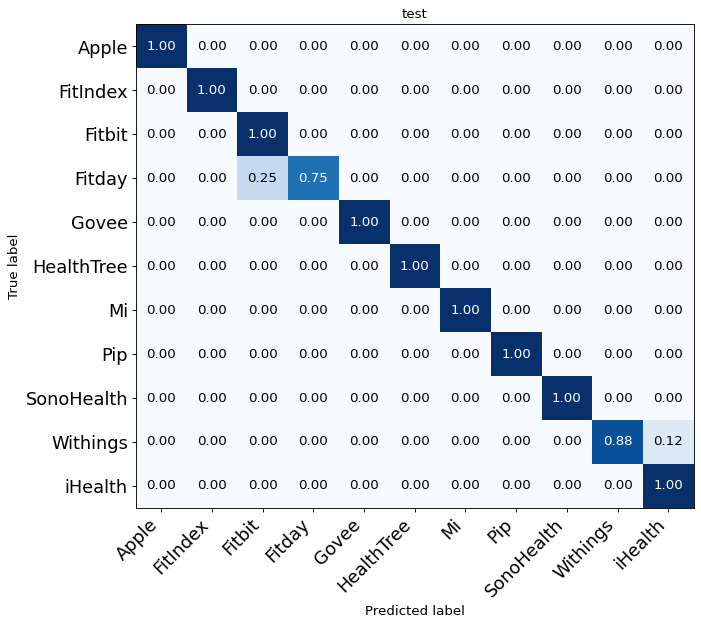

In [361]:
# Compute confusion matrix
figsize = (9, 8)
dpi= 80
labelfontsize=12


cm = sklearn.metrics.confusion_matrix(y_test, y_pred, normalize='true')
for i in range(len(cm)):
    for j in range(len(cm[i])):
        if cm[i][j] < 0.01:
            cm[i][j] = 0

print(cm)

classes = unique_labels(labelencoder.inverse_transform(y_test), labelencoder.inverse_transform(y_pred))
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
im = ax.imshow(cm, interpolation='none', aspect='auto', cmap=plt.cm.Blues, vmin=0, vmax=1.0)

plt.xlabel('Predicted label', fontsize=labelfontsize)
plt.ylabel('True label', fontsize=labelfontsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
        title="Prediction Result")

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                fontsize=labelfontsize,
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

In [362]:
# device classification
labelencoder = LabelEncoder()
actions = np.array(features['device'])
y = labelencoder.fit_transform(actions)
y = pd.Series(y)

X_features = features.drop(['brand', 'device', 'action'], axis = 1)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
X_features = np.array(X_features)
y = np.array(y)

scores = []
y_test_all = []
y_pred_all = []

i = 0
for train_index, test_index in sss.split(X_features, y):
    print("Fold", i)

    X_train, X_test = X_features[train_index], X_features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # use Random Forrest Classifier
    rf = RandomForestClassifier(n_jobs=8, n_estimators = 100, random_state = 0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    score = dict(
        accuracy = metrics.accuracy_score(y_test, y_pred),
        precision = metrics.precision_score(y_test, y_pred, average='micro'),
        recall = metrics.recall_score(y_test, y_pred, average='micro'),
        f1score = metrics.f1_score(y_test, y_pred, average='micro'),
    )
    print(score)
    scores.append(score)
        
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred.tolist())
    i += 1

score = {k: np.mean([value[k] for value in scores]) for k in scores[0]}
print("device_score:", score)
print(labelencoder.inverse_transform(y_test))
print(labelencoder.inverse_transform(y_pred))

Fold 0
{'accuracy': 0.9508196721311475, 'precision': 0.9508196721311475, 'recall': 0.9508196721311475, 'f1score': 0.9508196721311475}
Fold 1
{'accuracy': 0.9836065573770492, 'precision': 0.9836065573770492, 'recall': 0.9836065573770492, 'f1score': 0.9836065573770492}
Fold 2
{'accuracy': 0.9672131147540983, 'precision': 0.9672131147540983, 'recall': 0.9672131147540983, 'f1score': 0.9672131147540983}
Fold 3
{'accuracy': 0.9344262295081968, 'precision': 0.9344262295081968, 'recall': 0.9344262295081968, 'f1score': 0.9344262295081968}
Fold 4
{'accuracy': 0.9344262295081968, 'precision': 0.9344262295081968, 'recall': 0.9344262295081968, 'f1score': 0.9344262295081968}
Fold 5
{'accuracy': 0.9672131147540983, 'precision': 0.9672131147540983, 'recall': 0.9672131147540983, 'f1score': 0.9672131147540983}
Fold 6
{'accuracy': 0.9508196721311475, 'precision': 0.9508196721311475, 'recall': 0.9508196721311475, 'f1score': 0.9508196721311475}
Fold 7
{'accuracy': 0.9836065573770492, 'precision': 0.9836065

[[1.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.     1.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.     0.0625 0.9375 0.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.     0.     0.     0.     1.     0.     0.     0.     0.     0.
  0.     0.    ]
 [0.     0.     0.     0.     0.25   0.75   0.     0.     0.     0.
  0.     0.    ]
 [0.     0.     0.     0.     0.     0.     1.     0.     0.     0.
  0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     1.     0.     0.
  0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     1.     0.
  0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     1.
  0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  1.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.     0.     

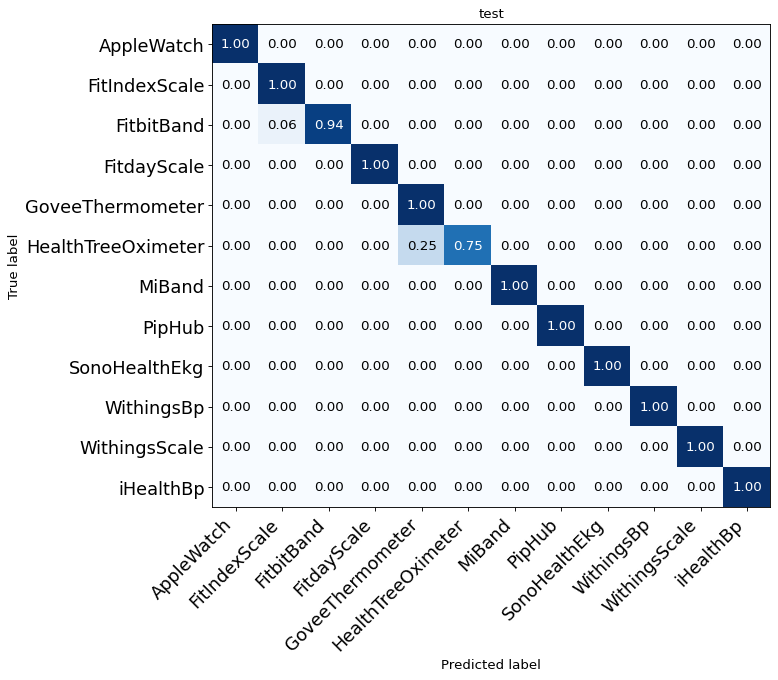

In [363]:
# confusion matrix
figsize = (9, 8)
dpi= 80
labelfontsize=12

 
cm = sklearn.metrics.confusion_matrix(y_test, y_pred, normalize='true')
for i in range(len(cm)):
    for j in range(len(cm[i])):
        if cm[i][j] < 0.01:
            cm[i][j] = 0

print(cm)

classes = unique_labels(labelencoder.inverse_transform(y_test), labelencoder.inverse_transform(y_pred))
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
im = ax.imshow(cm, interpolation='none', aspect='auto', cmap=plt.cm.Blues, vmin=0, vmax=1.0)

plt.xlabel('Predicted label', fontsize=labelfontsize)
plt.ylabel('True label', fontsize=labelfontsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
        title="Prediction Result")

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                fontsize=labelfontsize,
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

In [364]:
# action classification
labelencoder = LabelEncoder()
actions = np.array(features['action'])
y = labelencoder.fit_transform(actions)
y = pd.Series(y)

X_features = features.drop(['brand', 'device', 'action'], axis = 1)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
X_features = np.array(X_features)
y = np.array(y)

scores = []
y_test_all = []
y_pred_all = []

i = 0
for train_index, test_index in sss.split(X_features, y):
    print("Fold", i)

    X_train, X_test = X_features[train_index], X_features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # use Random Forrest Classifier
    rf = RandomForestClassifier(n_jobs=8, n_estimators = 100, random_state = 0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    score = dict(
        accuracy = metrics.accuracy_score(y_test, y_pred),
        precision = metrics.precision_score(y_test, y_pred, average='micro'),
        recall = metrics.recall_score(y_test, y_pred, average='micro'),
        f1score = metrics.f1_score(y_test, y_pred, average='micro'),
    )
    print(score)
    scores.append(score)
        
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred.tolist())
    i += 1

score = {k: np.mean([value[k] for value in scores]) for k in scores[0]}
print("action_score:", score)
print(labelencoder.inverse_transform(y_test))
print(labelencoder.inverse_transform(y_pred))

Fold 0
{'accuracy': 0.9180327868852459, 'precision': 0.9180327868852459, 'recall': 0.9180327868852459, 'f1score': 0.9180327868852459}
Fold 1
{'accuracy': 0.9016393442622951, 'precision': 0.9016393442622951, 'recall': 0.9016393442622951, 'f1score': 0.9016393442622952}
Fold 2
{'accuracy': 0.9180327868852459, 'precision': 0.9180327868852459, 'recall': 0.9180327868852459, 'f1score': 0.9180327868852459}
Fold 3
{'accuracy': 0.8524590163934426, 'precision': 0.8524590163934426, 'recall': 0.8524590163934426, 'f1score': 0.8524590163934426}
Fold 4
{'accuracy': 0.9508196721311475, 'precision': 0.9508196721311475, 'recall': 0.9508196721311475, 'f1score': 0.9508196721311475}
Fold 5
{'accuracy': 0.9016393442622951, 'precision': 0.9016393442622951, 'recall': 0.9016393442622951, 'f1score': 0.9016393442622952}
Fold 6
{'accuracy': 0.9672131147540983, 'precision': 0.9672131147540983, 'recall': 0.9672131147540983, 'f1score': 0.9672131147540983}
Fold 7
{'accuracy': 0.9836065573770492, 'precision': 0.9836065

[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.33333333 0.66666667 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.75
  0.25       0.         0.         0.         0.

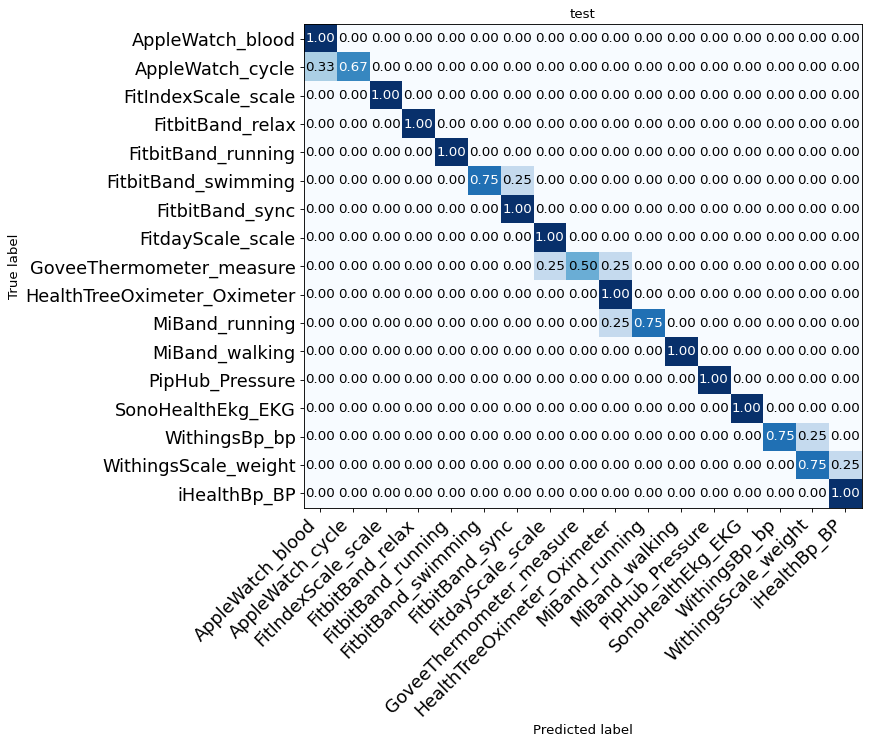

In [365]:
# confusion matrix
figsize = (9, 8)
dpi= 80
labelfontsize=12

 
cm = sklearn.metrics.confusion_matrix(y_test, y_pred, normalize='true')
for i in range(len(cm)):
    for j in range(len(cm[i])):
        if cm[i][j] < 0.01:
            cm[i][j] = 0

print(cm)

classes = unique_labels(labelencoder.inverse_transform(y_test), labelencoder.inverse_transform(y_pred))
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
im = ax.imshow(cm, interpolation='none', aspect='auto', cmap=plt.cm.Blues, vmin=0, vmax=1.0)

plt.xlabel('Predicted label', fontsize=labelfontsize)
plt.ylabel('True label', fontsize=labelfontsize)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        xticklabels=classes, yticklabels=classes,
        title="Prediction Result")

fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                fontsize=labelfontsize,
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")